In [2]:
import sklearn


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## 1) 데이터 로드

In [4]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
iris_df['target']= iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
#컬럼명 수정
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
iris_df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
#중복데이터 확인 후 중복데이터 제거

iris_df.loc[iris_df.duplicated()]

iris_df = iris_df.drop_duplicates()
iris_df


,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
#정보, 기술통계
iris_df.info()
iris_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   label         149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


,sepal_length,sepal_width,petal_length,petal_width,label
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
# 컬럼들의 상관관계 확인(-1`1사이의 값, 1: 강한상관관계, -1:약한상관관계)
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,label
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
label,0.786971,-0.422987,0.949402,0.956514,1.000000


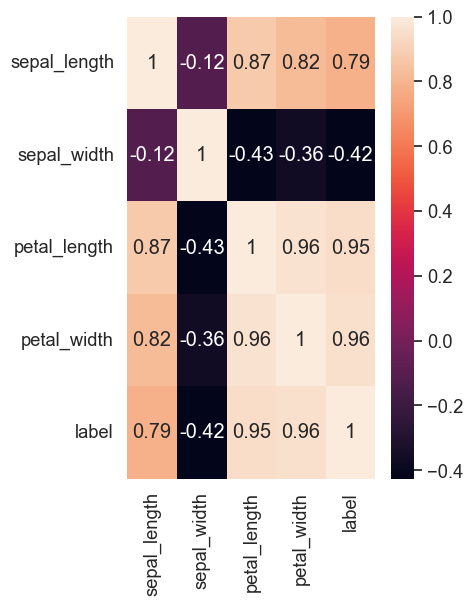

In [28]:
#데이터시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
plt.figure(figsize=(4,6))

#상관계수 히트맵
sns.heatmap(data=iris_df.corr(),annot=True, cbar=True)
plt.show()



In [ ]:
# label 값의 분포


## 3) Train, Test 테이터 셋 분할

In [35]:
#학습 데이터, 테스트 데이터 분리
X_data = iris_df.loc[:, "sepal_length":"petal_width"]
print(len(X_data))
y_data = iris_df.loc[:, "label"]


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.2,
                                                    shuffle= True,
                                                    random_state = 42)
#학습 데이터셋
print(X_train.shape, X_test.shape)

#테스트 데이터셋
print(y_train.shape, y_test.shape)

y_train

149
(119, 4) (30, 4)
(119,) (30,)


22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: label, Length: 119, dtype: int32

In [38]:
# 비율확인(클래스 레이블 분포 확인)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([40, 41, 38], dtype=int64))
(array([0, 1, 2]), array([10,  9, 11], dtype=int64))


In [40]:
# 원본데이터를 이용해서 크래스 비율을 유지
# stratify :클래스 비율을 유지하기 위한 옵션
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                   test_size = 0.2,
                                                   random_state = 7,
                                                   stratify = y_data)
#비율확인
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([40, 40, 39], dtype=int64))
(array([0, 1, 2]), array([10, 10, 10], dtype=int64))


## 4)모델생성

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree
#알고리즘 모델 초기화 사용 random_state
#무작위성을 ㅇ제어하기 위해서 모델을 생성할 때 설정하고
#동일한 하이퍼파라미터와 에이터에 대해 항상 같은 모델이 생성된다

DecisionTreeClassifier(random_state=42)

In [47]:
decision_tree.fit(X_train, y_train)
#X_train:학습데이터의 특성(꽃받침 길이와 폭)
#y_train : 학습데이터의 레이블(품종)

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred = decision_tree.predict(X_test)
#X_test는 테스트 데이터의 특성
#학습된 테스트 데이터의 예측값을 나타냄, y_pred 예측된 품종 레이블이 저장됨

In [50]:
y_pred

array([2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

## 6) 모델 평가

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 {accuracy}")

정확도 0.9333333333333333


### kNN 분류알고리즘


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 모델생성
knn = KNeighborsClassifier(algorithm="auto", leaf_size=30, metric="minkowski", metric_params=None, n_neighbors=7, p=2)
knn

KNeighborsClassifier(n_neighbors=7)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### svm 분류 알고리즘

In [59]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size = 0.2,
                                                   random_state = 62)
X_train.shape, X_test.shape
#모델생성
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='rbf', random_state = 100)
svm

SVC(random_state=100)

In [60]:
# 모델학습
svm.fit(X_train, y_train)

#모델예측
y_pred = svm.predict(X_test)
print(f"예측값 : {y_pred}")
print(f"라벨값 : {y_test}")

예측값 : [2 2 0 0 2 2 2 0 1 1 2 2 0 1 1 1 0 1 0 0 0 0 2 1 2 0 2 0 2 0]
라벨값 : [2 2 0 0 2 1 2 0 1 1 2 2 0 1 1 1 0 1 0 0 0 0 2 1 2 0 2 0 2 0]


In [61]:
#정확도 확인
svm_acc = accuracy_score(y_test, y_pred)
print(f"정확도 : {svm_acc}")

정확도 : 0.9666666666666667


In [72]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size = 0.3,
                                                   random_state = 264)
X_train.shape, X_test.shape


((105, 4), (45, 4))

In [73]:
from sklearn.linear_model import LogisticRegression
#모델생성
lr = LogisticRegression(penalty='l2', C=1.0, solver="lbfgs", max_iter=100,
                        random_state=None)
lr

LogisticRegression()

In [74]:
#모델 학습
lr.fit(X_train, y_train)

C:\korea_IT\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
#모델 예측
y_pred = lr.predict(X_test)
print(f"예측값 : {y_pred}")
print(f"라벨값 : {y_test}")
lr_acc = accuracy_score(y_test, y_pred)
print(f"정확도 : {lr_acc}")

예측값 : [1 0 2 1 1 2 0 2 1 2 1 1 1 2 0 0 1 2 2 0 1 1 2 2 0 0 0 0 0 1 2 0 2 1 0 2 0
 0 2 1 2 2 2 2 1]
라벨값 : [1 0 2 1 1 2 0 2 1 2 1 1 1 1 0 0 1 2 2 0 1 1 2 2 0 0 0 0 0 1 2 0 2 2 0 2 0
 0 2 1 2 2 2 2 1]
정확도 : 0.9555555555555556


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.93      0.93        14
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



- precision(정밀도) :positive 크래스로 예측한 샘플중 실제로 positive인 샘플의 비율을 나타냄
- recall(재현율) : 실제 positive인 샘플 중에서 모델이 positive로 정확하게 예측한 비율
- f1-score(f1점수):정밀도와 재현율의 조화 평균을 나타내는 값
- accuracy(정확도): 전체 예측 중에서 올바르레 예측한 비율
- macro avg(매크로 평균) : 클래스 별 지표의 평균을 계산함
- weighted ave(가중치 평균) : 클래스별 지표의 가중 평균(클래스의 지표를 해당 클래스의 샘플 수로 가중 평균하여 계산한 값)